In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
from NodeTransformer import NodeTransformer


# Default Bank Data.

In [4]:
data_path='C:/Users/xg16060/OneDrive - APG/dev_data/interestProfile/'
bank_data = pd.read_csv(data_path+'cell2celltrain.csv', sep=',')#d2
bank_data_hold_out = pd.read_csv(data_path+'cell2cellholdout.csv', sep=',')                   
#bank_data = pd.read_csv('./orange_small_train.data/cell2celltrain.csv', sep=',')
#bank_data_hold_out = pd.read_csv('./orange_small_train.data/cell2cellholdout.csv', sep=',')
#bank_data_label = pd.read_csv('./orange_small_train.data/orange_small_train_churn.labels.', header=None)

#bank_data= bank_data.iloc[:,1:]
bank_data.head()



,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
len(bank_data)
sum(bank_data.dtypes=='object')
bank_data.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [6]:
bank_data = bank_data.dropna()

In [7]:
bank_data.fillna('unknown', inplace=True)
bank_data
del bank_data['CustomerID']

In [8]:
import numpy as np

#bank_data = pd.read_csv('./adult.data', sep=',' ,header=None) CENSUS DATA

y = bank_data.iloc[:,0]

#student_data = student_data.iloc[:,0:-1]
bank_data = bank_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
bank_data.replace('?',np.nan,inplace=True)

bank_data.dropna(inplace=True)
bank_data= bank_data[(bank_data=='?')==False]



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
y.value_counts()

No     35507
Yes    14245
Name: Churn, dtype: int64

In [10]:
print(bank_data.columns[bank_data.dtypes=='object'])

bank_data.dtypes

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')


Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                     float64
H

In [11]:
del bank_data['Churn']

object_columns = list(bank_data.columns[bank_data.dtypes=='object'])

object_columns



['ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [12]:
(y=='Yes').apply(int)

0        1
1        1
2        0
3        0
4        1
        ..
51035    0
51037    0
51040    0
51041    1
51043    0
Name: Churn, Length: 49752, dtype: int64

In [13]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
# import labelencoder
from sklearn.preprocessing import LabelEncoder, StandardScaler# instantiate labelencoder object
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier


le = LabelEncoder()



from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in object_columns }

for col in object_columns:
    bank_data[col] = le_dict[col].fit_transform(bank_data[col])
    
    


#iris = load_breast_cancer()
#X = bank_data.iloc[:,1:-1]
X = bank_data.iloc[:,0:]

#y = bank_data.iloc[:,-1]#(student_data['target']=='ad.').apply(int)
y = (y=='Yes').apply(int) #(student_data['target']=='ad.').apply(int)

#y = (bank_data.iloc[:,-1]=='yes').apply(int) #(student_data['target']=='ad.').apply(int)


#label encoding.

#le_dict[col].transform(df_another[col])


#X = pd.get_dummies(X, prefix_sep='_', drop_first=True) #One hot encoding, assuming complet knowledge of vocabulary

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.4 )

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=0 ,test_size=0.8 )

In [14]:
y.value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [ ]:
print(np.shape(X_train))
print(np.shape(X_test))
               
print(np.shape(X_val))

In [ ]:
features = np.shape(X_train)[1]
features

In [ ]:
y

# Visualization of Decision Tree

# GRID SEARCHES with Node Transformer

In [17]:
%load_ext autoreload
%autoreload 2

In [18]:
seq_number = 50
depth = 5
dimension = 10

In [19]:
# example of usage of NodeTransformer
from NodeTransformer import NodeTransformer




ndt = NodeTransformer(n_estimators=seq_number,dimension=dimension, max_depth=depth, random_state = 0)


ndt.fit(X_train,y_train)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.75it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.79it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.41it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.33it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 25.84it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.29it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 24.66it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 26.23it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.74it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.40it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.53it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 83.02it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.97it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.04it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.14it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.99it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.06it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.31it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.52it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.48it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.81it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.31it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.13it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.46it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.20it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.81it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.93it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.41it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.97it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.52it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.39it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.12it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 82.93it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.69it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.05it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.11it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.52it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.99it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.54it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.61it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.91it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.85it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.94it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.10it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.43it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.76it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.87it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.46it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.77it/s]


NodeTransformer(dimension=10, impurity_reweight=True, max_depth=5,
        mode='Extended', n_estimators=50, n_walks=50, random_state=0,
        walk_length=5, window=5)

In [15]:
X_train_transformed = ndt.transform_matrix(X_train)

print(np.shape(X_train_transformed))

X_test_transformed = ndt.transform_matrix(X_test)
X_val_transformed = ndt.transform_matrix(X_val)


(29851, 10, 50)


In [16]:

X_train_transformed = np.transpose(X_train_transformed, (0, 2, 1))
X_test_transformed = np.transpose(X_test_transformed, (0, 2, 1))
X_val_transformed = np.transpose(X_val_transformed, (0, 2, 1))

print(np.shape(X_train_transformed))
print(np.shape(X_test_transformed))

(29851, 50, 10)
(15921, 50, 10)


In [38]:
X_train_transformed[0,2:7,:]

array([[-0.00618109,  0.04885866, -0.04162264,  0.0210702 ,  0.04422753,
         0.03028039,  0.04879882, -0.03102137, -0.02008596,  0.04160098],
       [ 0.02413832, -0.00363561,  0.04677626,  0.04913275, -0.00457093,
        -0.02147162, -0.04259786,  0.02613836, -0.00654882,  0.04786841],
       [-0.02464784, -0.00811235,  0.04660496, -0.03946406,  0.01951293,
         0.0003845 ,  0.0281433 , -0.00137219, -0.01756911,  0.03950493],
       [-0.00475749,  0.05248276, -0.04525705,  0.02439488,  0.04672652,
         0.02620569,  0.05241793, -0.02773769, -0.0242005 ,  0.04254932],
       [-0.00728051,  0.05001908, -0.04533743,  0.02214284,  0.04396686,
         0.02877265,  0.04848212, -0.03176776, -0.02309133,  0.04062906]],
      dtype=float32)

In [204]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle



param_grid = {'rfne__n_estimators':[50, 100, 200],
                   'rfne__max_depth':[5],'rfne__dimension' : [10]}

grid_results = []


for i,ii in tqdm(enumerate(param_grid['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid['rfne__max_depth']):
        for k,kk in enumerate(param_grid['rfne__dimension']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=ii,max_depth=jj,dimension=kk)), ('logreg',LogisticRegression())]

            pipe = Pipeline(estimators)
            auc = cross_validate(pipe,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj,kk]
            print(auc)
            grid_results.append(auc)
            pickle.dump(grid_results, open('grid_res_default.pkl','wb'))


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KeyboardInterrupt: 

In [96]:
import pickle

pickle.dump(grid_results, open('grid_res.pkl','wb'))

In [60]:
grid_results


[{'fit_time': array([72.89865279, 76.02229881, 75.3750298 , 72.37605309, 64.37732291,
         65.12831426, 66.71780515, 66.7747004 , 50.05456042, 48.89764094]),
  'score_time': array([2.31381226, 1.7694788 , 1.84033775, 2.29785347, 2.6638763 ,
         2.5920682 , 2.42750597, 2.26793551, 1.51893806, 1.63762212]),
  'test_score': array([0.77065086, 0.77177886, 0.773256  , 0.77682171, 0.76426914,
         0.75854171, 0.76652242, 0.77139032, 0.78405396, 0.79211103]),
  'pars': [50, 5, 10]},
 {'fit_time': array([156.3336463 , 157.69001555, 150.98791718, 152.57766771,
         149.73688579, 150.03708315, 149.93636727, 152.5792098 ,
         104.39023852, 105.01756215]),
  'score_time': array([6.15054727, 5.74463582, 6.00097203, 5.76061583, 4.94877791,
         4.98567986, 5.40446043, 4.35734582, 3.98135209, 3.63029027]),
  'test_score': array([0.76946   , 0.76995314, 0.77578457, 0.782192  , 0.76137029,
         0.75939829, 0.7564876 , 0.77137206, 0.77983655, 0.79469877]),
  'pars': [100, 5

In [202]:
# for combination nodetransformer + logistic regression
for i in grid_results:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))
    

[50, 5, 10] 0.7115319527143976 +/-0.047778


# GRID Results Standard Algorithms

In [16]:
# Logistic
from sklearn.linear_model import LogisticRegression
import pickle


grid_resultsl =[]

for P in ['l1','l2']:
    estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty=P))]
    pipel = Pipeline(estimatorsl)
    auc = cross_validate(pipel,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = P
    grid_resultsl.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsl, open('grid_res_log_default.pkl','wb'))
    print(auc)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   34.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_p

{'fit_time': array([ 2.71199942,  4.0109992 ,  5.409024  ,  6.20202494, 21.24402404,
        4.49400043,  8.47200012,  3.1129992 , 12.82599878,  3.31100702]), 'score_time': array([0.37299943, 0.17599916, 0.07499886, 0.18899989, 0.06300044,
       0.14700341, 0.10599971, 0.18999958, 0.12499785, 0.13899231]), 'test_score': array([0.61204369, 0.60012013, 0.60766001, 0.62788428, 0.61868522,
       0.61202755, 0.63119273, 0.61774845, 0.61652073, 0.61909244]), 'train_score': array([0.62324451, 0.62446509, 0.62295421, 0.62110672, 0.6211677 ,
       0.62245964, 0.62069606, 0.6224477 , 0.62214945, 0.62103431]), 'pars': 'l1'}
{'fit_time': array([3.6699996 , 3.35599446, 3.77399898, 3.42199898, 3.55799937,
       3.4690001 , 3.97300053, 3.2559998 , 3.06299996, 3.46699953]), 'score_time': array([0.11400008, 0.13999963, 0.37100124, 0.67600417, 0.12300062,
       0.14400554, 0.26499987, 0.25000072, 0.09200048, 0.1060009 ]), 'test_score': array([0.61201617, 0.60012839, 0.60763025, 0.6279719 , 0.618490

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   12.5s finished


In [17]:
for i in grid_resultsl:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

l1 0.6162975223431053 +/-0.016911
l2 0.6162576302783254 +/-0.016883


In [18]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
import pickle


grid_resultsk =[]

for k in range(1,11):
    estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=k))]
    pipek = Pipeline(estimatorsk)
    auc = cross_validate(pipek,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = k
    grid_resultsk.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsk, open('grid_res_nn_default.pkl','wb'))
    print(auc)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   58.1s finished


{'fit_time': array([4.52274466, 4.31221366, 4.72158003, 4.88889456, 5.62920141,
       5.45067739, 5.51710463, 5.43293643, 2.73369646, 3.07453442]), 'score_time': array([14.81306744, 15.06149697, 15.01835942, 15.34173512, 14.43304563,
       14.61057305, 14.7004509 , 14.6992054 , 12.0041945 , 12.50310612]), 'test_score': array([0.51620686, 0.50793222, 0.52605869, 0.51781788, 0.51650503,
       0.52203885, 0.5129646 , 0.49899986, 0.51476236, 0.5208734 ]), 'pars': 1}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   58.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([4.97793555, 4.69867992, 5.09761572, 4.75652671, 4.75107908,
       5.10885215, 5.37181902, 5.35005975, 2.98697901, 2.97523403]), 'score_time': array([16.2052362 , 16.2572124 , 16.24625492, 16.43263268, 14.9017663 ,
       14.99948478, 15.23153543, 15.24131203, 11.89699912, 12.24921608]), 'test_score': array([0.51298486, 0.53042981, 0.53010718, 0.52759113, 0.51485218,
       0.53592175, 0.52577986, 0.51940322, 0.5274575 , 0.52937925]), 'pars': 2}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   59.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([5.14457989, 5.30501246, 5.2345562 , 5.06874776, 4.89068246,
       5.12537718, 5.40105677, 5.58724761, 2.94792771, 2.94934964]), 'score_time': array([15.58736515, 16.11724854, 15.96913195, 16.01425838, 14.82518053,
       14.89445591, 14.92834234, 14.96585894, 12.22318435, 12.59416056]), 'test_score': array([0.52074787, 0.53419755, 0.53674997, 0.52556964, 0.52971704,
       0.54278854, 0.53105359, 0.53182973, 0.53120264, 0.53449649]), 'pars': 3}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   59.5s finished


{'fit_time': array([5.0839324 , 5.20913005, 4.89315963, 5.17821383, 4.91473031,
       5.41999245, 6.16545606, 5.91047096, 3.69178748, 3.47766709]), 'score_time': array([15.62415671, 15.90719247, 15.71121073, 15.7799418 , 14.63109541,
       14.85973144, 15.0380547 , 15.14608908, 12.59038019, 12.88531709]), 'test_score': array([0.53265782, 0.52287009, 0.53300951, 0.53398733, 0.52579556,
       0.54915195, 0.52979391, 0.53066235, 0.5450883 , 0.5318818 ]), 'pars': 4}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   59.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([4.9317522 , 4.81789804, 4.50423908, 4.63891411, 4.20189309,
       4.6256566 , 5.32722735, 5.43668389, 3.30902505, 3.12512779]), 'score_time': array([17.45692062, 17.35875964, 17.23387766, 17.49186778, 15.02404332,
       15.30758214, 15.29060125, 15.27661467, 11.70895219, 12.127949  ]), 'test_score': array([0.53334966, 0.53271745, 0.53327483, 0.53554539, 0.53433696,
       0.5506494 , 0.53274528, 0.53756578, 0.552996  , 0.54635239]), 'pars': 5}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   59.1s finished


{'fit_time': array([5.00742912, 4.57175732, 4.81738758, 5.02201033, 5.10340309,
       5.22507811, 5.54819131, 5.4543159 , 3.17030096, 3.02363706]), 'score_time': array([16.17354083, 16.19531655, 16.11923289, 16.52497768, 14.78135252,
       15.21130562, 15.27149248, 15.36526418, 12.21496463, 12.59641433]), 'test_score': array([0.54548995, 0.53247086, 0.53401818, 0.54261028, 0.54207108,
       0.55763163, 0.53630197, 0.53287147, 0.55634991, 0.54985342]), 'pars': 6}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.0min finished


{'fit_time': array([5.91529632, 5.70117331, 5.83954716, 5.81450772, 4.83771014,
       5.48995733, 5.27044439, 5.45158648, 3.28316832, 3.1851244 ]), 'score_time': array([15.92085695, 16.08111858, 15.93576717, 16.10699987, 15.01392245,
       15.14520383, 15.11346507, 15.11549926, 12.20951056, 12.54777026]), 'test_score': array([0.55066033, 0.53255545, 0.53535473, 0.54073426, 0.54940047,
       0.56210635, 0.54442871, 0.53691666, 0.55964017, 0.55422813]), 'pars': 7}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.0min finished


{'fit_time': array([4.77739   , 5.06514335, 5.26624537, 5.01327991, 5.36513233,
       6.05000305, 5.26844501, 5.40791774, 2.97237372, 3.26699901]), 'score_time': array([16.40674567, 16.57873178, 16.75974631, 16.75678778, 15.21382403,
       15.09851384, 14.99001384, 15.21483397, 12.61569166, 12.91403317]), 'test_score': array([0.55463527, 0.53363742, 0.53768811, 0.54033669, 0.54360325,
       0.56972393, 0.54825982, 0.54026395, 0.5700788 , 0.55287588]), 'pars': 8}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([4.93672371, 4.857934  , 5.04842496, 4.66445112, 5.48007417,
       5.83811879, 5.92516804, 5.98752165, 2.9749279 , 3.00554943]), 'score_time': array([16.18268442, 16.37185168, 16.4601624 , 16.44398665, 15.54083776,
       15.5578146 , 15.6076622 , 15.66446114, 11.99524808, 12.24856448]), 'test_score': array([0.55147381, 0.53320264, 0.54264637, 0.54270809, 0.54986444,
       0.56694751, 0.55375341, 0.549417  , 0.57592836, 0.56048299]), 'pars': 9}
{'fit_time': array([5.14447761, 5.01456165, 4.88575983, 4.90930057, 5.8826828 ,
       6.38669944, 6.01677561, 6.36301541, 2.84890127, 2.96796393]), 'score_time': array([15.81417084, 15.8277545 , 15.93658781, 15.91568947, 15.17182636,
       15.19360852, 15.13886666, 15.28855205, 11.93701959, 12.34760189]), 'test_score': array([0.54791002, 0.53485907, 0.54230004, 0.54639151, 0.55107591,
       0.5683816 , 0.55794572, 0.5437614 , 0.57192065, 0.56542416]), 'pars': 10}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   59.5s finished


In [19]:
for i in grid_resultsk:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

1 0.5154159745615029 +/-0.014221
2 0.5253906751519933 +/-0.013643
3 0.5318353053197546 +/-0.011165
4 0.533489862270735 +/-0.014891
5 0.538953315799553 +/-0.014728
6 0.5429668758212383 +/-0.017371
7 0.5466025259781244 +/-0.019100
8 0.5491103101640186 +/-0.023727
9 0.5526424633369751 +/-0.023237
10 0.5529970085192676 +/-0.022988


In [25]:
#random forest
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_rf = {'rfne__n_estimators':[ 100, 200],
                   'rfne__max_depth':[ 10,15]}

grid_results_rf = []



for i,ii in tqdm(enumerate(param_grid_rf['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid_rf['rfne__max_depth']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=ii,max_depth = jj))]

            pipe_rf = Pipeline(estimators_rf)
            auc = cross_validate(pipe_rf,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj]
            grid_results_rf.append(auc) 
            pickle.dump(grid_results_rf, open('grid_results_rf_default.pkl','wb'))
            print(auc)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   19.1s finished


{'fit_time': array([5.82641554, 5.98598981, 6.03186679, 6.07076192, 5.71870136,
       5.58406353, 5.69973922, 5.52223015, 4.95275044, 4.94078636]), 'score_time': array([0.08277988, 0.07480121, 0.08377647, 0.07180882, 0.07380414,
       0.07480097, 0.10870934, 0.08078527, 0.07579827, 0.07080889]), 'test_score': array([0.66778635, 0.67458328, 0.64738724, 0.6557096 , 0.66931699,
       0.65984681, 0.67568425, 0.66251164, 0.66750902, 0.65314616]), 'pars': [100, 10]}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   25.9s finished


{'fit_time': array([8.53018284, 8.64785409, 8.5980022 , 8.43544245, 8.20010638,
       8.1711843 , 8.32277822, 8.28886962, 6.95343757, 6.82478428]), 'score_time': array([0.11070371, 0.12167501, 0.11369872, 0.08181882, 0.11768603,
       0.12367058, 0.10372233, 0.09973526, 0.07579136, 0.07380033]), 'test_score': array([0.66535416, 0.67256096, 0.65029288, 0.66152969, 0.67304422,
       0.65930624, 0.67589255, 0.6703061 , 0.66041052, 0.65054305]), 'pars': [100, 15]}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([11.4364109 , 11.43441725, 11.50323224, 11.46333647, 11.19516158,
       11.22608089, 11.15027857, 11.21710324,  9.45072341,  9.5415163 ]), 'score_time': array([0.13563824, 0.12865877, 0.15957403, 0.15358996, 0.14162016,
       0.14561057, 0.15259314, 0.14561033, 0.11871529, 0.09873176]), 'test_score': array([0.67104027, 0.67113487, 0.64834771, 0.65788897, 0.67266676,
       0.66024852, 0.68419397, 0.66901777, 0.66106902, 0.6515779 ]), 'pars': [200, 10]}
{'fit_time': array([16.60557652, 16.28841996, 16.15478897, 16.29640841, 16.34815311,
       16.40201068, 16.16564012, 16.48678255, 14.04819131, 13.8267777 ]), 'score_time': array([0.18450832, 0.24335003, 0.22240567, 0.23038435, 0.19448042,
       0.18852592, 0.18051648, 0.18114495, 0.14664078, 0.14860868]), 'test_score': array([0.67482367, 0.67503623, 0.6510186 , 0.65862571, 0.67615098,
       0.66586472, 0.68074446, 0.67033972, 0.66417633, 0.65895743]), 'pars': [200, 15]}



[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   49.1s finished


In [26]:
for i in grid_results_rf:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

[100, 10] 0.6633481347924348 +/-0.017323
[100, 15] 0.6639240374079165 +/-0.016952
[200, 10] 0.6647185744055477 +/-0.020205
[200, 15] 0.6675737843487456 +/-0.017594


In [20]:
# Testing



estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=10))]
pipek = Pipeline(estimatorsk)
    


pipek.fit(X_train,y_train)
                                                                                         
print(roc_auc_score(y_test, pipek.predict_proba(X_test)[:,1]))                                                                           
            

0.5334975282046593


## SVM with grid search 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix ,make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_svm = { 'C':[0.1,1,10],'kernel':['linear','rbf'],
             'gamma': [1, 0.1, 0.01]}

# param_grid_svm = { 'C':[0.1,1,100,1000],'kernel':['rbf','sigmoid','linear'],
#                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],}

grid_results_svm =[]
for i,ii in tqdm(enumerate(param_grid_svm['C'])):
    for j,jj in enumerate(param_grid_svm['kernel']):
        for w,ww in enumerate(param_grid_svm['gamma']):
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_svm = [('scale', StandardScaler()), 
                             ('svm',SVC(C=ii, gamma=ww, kernel=jj, random_state=123))]

            pipe_svm = Pipeline(estimators_svm)
            auc = cross_validate(pipe_svm,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj,ww]
            grid_results_svm.append(auc) 
            pickle.dump(grid_results_svm, open('grid_results_svm_default.pkl','wb'))
            print(auc)

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 23.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_p

{'fit_time': array([438.44341421, 438.45441747, 437.90835929, 436.16320682,
       390.13534474, 391.02034163, 388.93234468, 390.00834417,
       280.40332913, 282.46648455]), 'score_time': array([11.68268728, 12.00271726, 11.99871969, 11.88070703, 10.85700727,
       10.85200334, 10.65400624, 10.78400588,  9.0034163 ,  9.46443629]), 'test_score': array([0.50895929, 0.50465326, 0.52725003, 0.51422014, 0.51727235,
       0.51801543, 0.5216443 , 0.50241245, 0.51718666, 0.53456096]), 'train_score': array([0.9999985 , 0.99999757, 0.9999987 , 0.99999395, 0.99999922,
       0.9999988 , 0.99999883, 0.99999836, 0.99999785, 0.99999833]), 'pars': [0.1, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 20.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([325.4649632 , 329.6920433 , 324.3768487 , 326.90989947,
       409.07833195, 409.37532449, 409.52431321, 407.43830204,
       203.85762596, 203.81762195]), 'score_time': array([10.0781939 , 10.00719452,  9.85419226,  9.88719225,  9.30202723,
        9.4440279 , 10.17702842,  9.86702824,  6.62302876,  6.60601616]), 'test_score': array([0.55701709, 0.567919  , 0.56428048, 0.55802783, 0.573695  ,
       0.57281113, 0.57465601, 0.57537071, 0.56777518, 0.5642364 ]), 'train_score': array([0.98054911, 0.98176244, 0.98077578, 0.98030729, 0.98117837,
       0.9809152 , 0.98101712, 0.98034772, 0.98115385, 0.9810255 ]), 'pars': [0.1, 'rbf', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 14.8min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([279.60113621, 280.6911335 , 282.7571373 , 271.23212838,
       241.47992468, 251.29992652, 208.82886648, 249.6069231 ,
       165.42806149, 185.47725606]), 'score_time': array([6.86400557, 6.85401964, 6.74300671, 6.81100607, 7.03800273,
       6.85200405, 6.89200401, 6.94200468, 4.97332335, 4.92432022]), 'test_score': array([0.56718725, 0.57970574, 0.58822207, 0.57567378, 0.58371511,
       0.57641714, 0.59290922, 0.60844138, 0.56153575, 0.57966662]), 'train_score': array([0.81300326, 0.81359298, 0.81741154, 0.812072  , 0.81383713,
       0.81148626, 0.81416846, 0.81571264, 0.81384909, 0.81255367]), 'pars': [0.1, 'rbf', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  7.3min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([133.94292641, 113.90437627, 123.12562943, 112.77734303,
       107.1509738 , 107.4349823 , 108.01599908, 116.51127458,
        86.68666744,  83.36957502]), 'score_time': array([4.81813169, 5.26914597, 4.88013315, 4.95413589, 4.66812992,
       5.50215125, 4.8611424 , 4.94413686, 3.37603831, 3.35003877]), 'test_score': array([0.5010818 , 0.51296322, 0.52186196, 0.51786582, 0.50783799,
       0.49237967, 0.47642871, 0.53401901, 0.54290949, 0.48538146]), 'train_score': array([0.50545303, 0.5115454 , 0.52990785, 0.52262002, 0.53345934,
       0.49500036, 0.4736098 , 0.52307947, 0.53449205, 0.50492198]), 'pars': [0.1, 'linear', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  8.6min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([171.53466177, 141.87031651, 153.75645685, 140.46229672,
       130.00195289, 129.28291059, 127.65237594, 138.49527216,
        85.34780431,  82.66174722]), 'score_time': array([6.9331789 , 7.57108903, 6.66307759, 7.84109545, 6.11505508,
       6.1570611 , 6.04612517, 6.08363962, 3.33507347, 3.38407111]), 'test_score': array([0.5010818 , 0.51296322, 0.52186196, 0.51786582, 0.50783799,
       0.49237967, 0.47642871, 0.53401901, 0.54290949, 0.48538146]), 'train_score': array([0.50545303, 0.5115454 , 0.52990785, 0.52262002, 0.53345934,
       0.49500036, 0.4736098 , 0.52307947, 0.53449205, 0.50492198]), 'pars': [0.1, 'linear', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  7.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([132.97772408, 113.48286939, 121.47554946, 112.43584776,
       118.72977972, 118.12877417, 120.51577187, 133.50384998,
        94.69135666,  91.79734397]), 'score_time': array([4.80104494, 5.23310781, 5.31410956, 5.31510973, 6.89406037,
       6.8810637 , 6.64305067, 5.64209533, 3.71501589, 3.75901699]), 'test_score': array([0.5010818 , 0.51296322, 0.52186196, 0.51786582, 0.50783799,
       0.49237967, 0.47642871, 0.53401901, 0.54290949, 0.48538146]), 'train_score': array([0.50545303, 0.5115454 , 0.52990785, 0.52262002, 0.53345934,
       0.49500036, 0.4736098 , 0.52307947, 0.53449205, 0.50492198]), 'pars': [0.1, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 27.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([504.75029063, 508.42384672, 508.82485318, 501.7022531 ,
       472.58224583, 470.5122118 , 471.79719424, 468.57618189,
       345.82230496, 347.52230597]), 'score_time': array([14.8936944 , 14.69517875, 14.68117976, 14.7066927 , 10.28502727,
       10.27202892, 10.66202903, 10.45802975,  7.25201082,  7.25401068]), 'test_score': array([0.50885857, 0.50478661, 0.52746274, 0.51448188, 0.51779722,
       0.51706268, 0.5214316 , 0.50259567, 0.51735253, 0.53471249]), 'train_score': array([0.99999854, 0.9999976 , 0.9999987 , 0.99999756, 0.99999922,
       0.99999888, 0.99999888, 0.99999846, 0.99999788, 0.99999832]), 'pars': [1, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 20.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([385.85123348, 388.4292376 , 382.35222983, 387.42423749,
       346.2788322 , 343.73966098, 344.1180048 , 342.23495364,
       257.49113202, 254.08979201]), 'score_time': array([9.2460103 , 9.25800848, 9.12600946, 9.09500647, 9.05678201,
       8.74876142, 9.07629585, 9.00728893, 6.47522187, 6.48422194]), 'test_score': array([0.55710516, 0.56710676, 0.56435983, 0.55806695, 0.57283097,
       0.5722116 , 0.5735611 , 0.57454691, 0.56804491, 0.56400827]), 'train_score': array([0.9813082 , 0.98236814, 0.98153779, 0.98098891, 0.98169032,
       0.98155862, 0.98198225, 0.98095283, 0.98175025, 0.9818316 ]), 'pars': [1, 'rbf', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 15.6min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([283.74977136, 249.10419059, 283.74571776, 244.07105803,
       304.0241003 , 298.96206164, 297.61260748, 261.45438671,
       173.69191217, 201.77095604]), 'score_time': array([7.2291081 , 6.62113428, 6.68309951, 6.57113409, 6.5040369 ,
       6.73803592, 7.01403737, 6.64402628, 4.90800834, 5.36400771]), 'test_score': array([0.56711019, 0.58047334, 0.58620967, 0.57641659, 0.58492244,
       0.57866759, 0.59514919, 0.61025926, 0.56022538, 0.58070092]), 'train_score': array([0.81294838, 0.81365342, 0.81626124, 0.81412358, 0.81567831,
       0.81412957, 0.81511822, 0.81721005, 0.81506648, 0.8131737 ]), 'pars': [1, 'rbf', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 30.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([ 584.02747059, 1069.89206028,  560.74043489, 1015.34056401,
        503.6263628 ,  534.9012289 ,  592.93784571,  669.01072907,
        539.04569197,  523.17334461]), 'score_time': array([5.8355248 , 6.1361618 , 6.99701285, 6.26516414, 5.9231565 ,
       6.10119176, 5.95207882, 4.49606514, 6.45908928, 4.66706276]), 'test_score': array([0.50404841, 0.50361593, 0.52429315, 0.53014299, 0.4870208 ,
       0.52031575, 0.50841548, 0.51945723, 0.51123736, 0.47969527]), 'train_score': array([0.48736491, 0.50528169, 0.52767044, 0.52764223, 0.50722326,
       0.53116641, 0.50316639, 0.51658868, 0.50160557, 0.5044811 ]), 'pars': [1, 'linear', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 32.6min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([ 641.46282315, 1132.45214367,  615.64068675, 1075.89548016,
        515.09631443,  550.37997842,  620.95402765,  708.30841398,
        569.87033415,  562.71522975]), 'score_time': array([5.74805784, 6.2061255 , 6.00003338, 6.31017375, 7.53314996,
       6.04212356, 7.85708761, 4.53604388, 7.17211032, 4.94305086]), 'test_score': array([0.50404841, 0.50361593, 0.52429315, 0.53014299, 0.4870208 ,
       0.52031575, 0.50841548, 0.51945723, 0.51123736, 0.47969527]), 'train_score': array([0.48736491, 0.50528169, 0.52767044, 0.52764223, 0.50722326,
       0.53116641, 0.50316639, 0.51658868, 0.50160557, 0.5044811 ]), 'pars': [1, 'linear', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 31.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([ 686.41324878, 1157.51727748,  663.15112805, 1100.82675338,
        485.53711009,  519.77026415,  562.14825916,  642.72358561,
        518.69966054,  505.19117665]), 'score_time': array([5.39203072, 5.83915615, 5.72003007, 7.08419085, 5.68215346,
       5.62510753, 6.89209843, 4.27404475, 6.56109571, 4.11105132]), 'test_score': array([0.50404841, 0.50361593, 0.52429315, 0.53014299, 0.4870208 ,
       0.52031575, 0.50841548, 0.51945723, 0.51123736, 0.47969527]), 'train_score': array([0.48736491, 0.50528169, 0.52767044, 0.52764223, 0.50722326,
       0.53116641, 0.50316639, 0.51658868, 0.50160557, 0.5044811 ]), 'pars': [1, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 298.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([  707.87366056,   692.42457294,   685.34152985,   710.40267563,
         671.26368284,   689.43071485,   669.65461135,   702.27669692,
       16232.7410264 , 16235.31797218]), 'score_time': array([10.55406117, 10.08505917, 10.28906083, 10.50706267, 10.05202866,
        9.94802833,  9.86502862,  9.99502993,  7.79300237,  7.97100353]), 'test_score': array([0.51392603, 0.50569087, 0.52534757, 0.51732525, 0.52005648,
       0.52254636, 0.52301226, 0.50473867, 0.52031712, 0.53354374]), 'train_score': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999999, 1.        , 1.        ]), 'pars': [10, 'rbf', 1]}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 76.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([1297.42210841, 1289.56210613, 1300.2504909 , 1295.4794991 ,
       1720.27295828, 1732.29395747, 1720.65095806, 1718.28995895,
       1015.60640287, 1005.70853615]), 'score_time': array([18.87200737, 18.62300754, 18.57700586, 18.75200725, 20.37900949,
       20.52901125, 20.98301339, 20.47301149, 14.20453   , 14.47014618]), 'test_score': array([0.55277522, 0.56666869, 0.5505447 , 0.55018928, 0.55126932,
       0.5671007 , 0.55699683, 0.5453517 , 0.56576498, 0.55495798]), 'train_score': array([0.9958582 , 0.99617807, 0.99527497, 0.99602111, 0.99570219,
       0.99520715, 0.99652712, 0.99551598, 0.99640991, 0.99549475]), 'pars': [10, 'rbf', 0.1]}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 45.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([929.85630584, 941.32437372, 814.40148854, 821.31757808,
       930.73093987, 828.41208172, 836.03595591, 834.65379548,
       614.81163096, 617.52375031]), 'score_time': array([14.50908732, 14.44308567, 14.49616003, 14.62037396, 12.54887223,
       14.12921906, 12.54629803, 11.08148599, 11.01204658, 11.27114177]), 'test_score': array([0.56344568, 0.5757884 , 0.58523708, 0.56931809, 0.58382973,
       0.57802893, 0.58941562, 0.60647362, 0.5636837 , 0.57573881]), 'train_score': array([0.84202224, 0.84206011, 0.84199409, 0.84251991, 0.84294638,
       0.83973736, 0.84037384, 0.84277471, 0.84311133, 0.84175971]), 'pars': [10, 'rbf', 0.01]}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [ ]:
for i in grid_results_svm:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

## ANN with grid search

In [15]:
# 2 layers ANN model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

def create_model(learn_rate, momentum):
    #create a model
    model=Sequential()
    model.add(Dense(24,input_dim=56,activation='relu'))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#creat a model
model=KerasClassifier(build_fn=create_model, verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8 ]

param_grid_ann=dict(learn_rate=learn_rate, momentum=momentum)

cv_sk = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
grid=GridSearchCV(estimator=model, param_grid=param_grid_ann, n_jobs=-1,cv=cv_sk)
grid_result = grid.fit(X_train, y_train)



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [16]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.715230 using {'learn_rate': 0.1, 'momentum': 0.0}
0.684690 (0.067855) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.704175 (0.020313) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.708117 (0.009724) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.711311 (0.006034) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.714046 (0.002265) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.715163 (0.000201) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.715074 (0.000608) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.715163 (0.000196) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.715197 (0.000189) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.715208 (0.000091) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.715230 (0.000097) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.715130 (0.000260) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.715107 (0.000666) with: {'learn_rate': 0.1, 'momentum': 0.4}
0.715208 (0.000117) with: {'learn_rate': 0.1, 'momentum': 0.6}
0.715230 (0.000097) with: {'learn_rate': 0.1,

## Apply optimized parameters

In [45]:
#random forest
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score,accuracy_score
from tqdm import tqdm_notebook as tqdm

estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=200,max_depth = 10))]
pipe_rf = Pipeline(estimators_rf)
                  
pipe_rf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:,1]))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.6594605505089695


In [47]:
y_pre=pipe_rf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7157213742855348
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     11355
           1       0.61      0.02      0.05      4566

   micro avg       0.72      0.72      0.72     15921
   macro avg       0.66      0.51      0.44     15921
weighted avg       0.69      0.72      0.61     15921



In [48]:
from sklearn.ensemble import ExtraTreesClassifier

estimators_erf = [('scale', StandardScaler()), ('rf',ExtraTreesClassifier(n_estimators=200,max_depth = 20))]
pipe_erf = Pipeline(estimators_erf)
                  
pipe_erf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_erf.predict_proba(X_test)[:,1]))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.6255193509046726


In [49]:
y_pre=pipe_erf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.714088311035739
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     11355
           1       0.55      0.02      0.03      4566

   micro avg       0.71      0.71      0.71     15921
   macro avg       0.63      0.51      0.43     15921
weighted avg       0.67      0.71      0.60     15921



In [56]:
# Testing
from sklearn.neighbors import KNeighborsClassifier
estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=10))]
pipek = Pipeline(estimatorsk)
    


pipek.fit(X_train,y_train)
                                                                                         
print(roc_auc_score(y_test, pipek.predict_proba(X_test)[:,1])) 


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.5334975282046593


In [57]:
y_pre=pipek.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre )) 

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7002700835374662
              precision    recall  f1-score   support

           0       0.72      0.96      0.82     11355
           1       0.37      0.06      0.11      4566

   micro avg       0.70      0.70      0.70     15921
   macro avg       0.54      0.51      0.46     15921
weighted avg       0.62      0.70      0.62     15921



In [2]:
#testing for SVM

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

model_svm=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import roc_curve
roc = roc_curve(model_svm.predict_proba(X_test, y_test))
print(roc)
y_pre=pipek.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre )) 

NameError: name 'X_train' is not defined

In [50]:
estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty='l2'))]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6086820376828483


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [51]:
y_pre=pipel.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

0.712832108535896
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     11355
           1       0.49      0.03      0.06      4566

   micro avg       0.71      0.71      0.71     15921
   macro avg       0.60      0.51      0.44     15921
weighted avg       0.65      0.71      0.61     15921



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [14]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

estimatorsl = [('scale', MinMaxScaler()), ('rfne', ComplementNB())]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))

0.5686484812119059


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=50,max_depth=5,dimension=50)), ('logreg',LogisticRegression(max_iter=1000))]
rfne_pipe = Pipeline(estimators)

rfne_pipe.fit(X_train,y_train)   

print(roc_auc_score(y_test, rfne_pipe.predict_proba(X_test)[:,1]))




C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.69it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.50it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.29it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.95it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.61it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.62it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.90it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.58it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.29it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.05it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.27it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.17it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.67it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.21it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.60it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.88it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.42it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.93it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.61it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.27it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.03it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.12it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.75it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.02it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.17it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.43it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.73it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.69it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.65it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.88it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.94it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.74it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.36it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.27it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.25it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.92it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.44it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.30it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.62it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.92it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.31it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.12it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.49it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.95it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.66it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.69it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.81it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

0.6534469350451415


In [54]:
y_pre=rfne_pipe.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre )) 

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

0.7147164122856604
              precision    recall  f1-score   support

           0       0.73      0.95      0.83     11355
           1       0.51      0.13      0.21      4566

   micro avg       0.71      0.71      0.71     15921
   macro avg       0.62      0.54      0.52     15921
weighted avg       0.67      0.71      0.65     15921



In [1]:
# 2 layers ANN model with best hyperparameters

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


    #create a model
model=Sequential()
model.add(Dense(24,input_dim=56,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#compile model
optimizer = SGD(lr=0.001, momentum=0.0)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
# Fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)

#history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set
# list all data in history

print(history.history.keys())


NameError: name 'X_train' is not defined

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.71      1.00      0.83     11355
           1       0.33      0.00      0.00      4566

   micro avg       0.71      0.71      0.71     15921
   macro avg       0.52      0.50      0.42     15921
weighted avg       0.60      0.71      0.59     15921

AUC :  0.5000214381063643


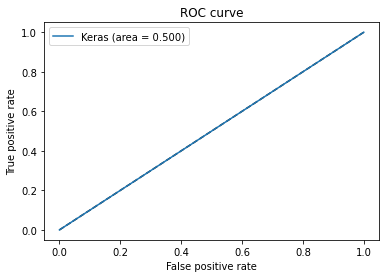

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()

In [32]:
# 2 layers ANN model with best hyperparameters

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = Sequential()
model.add(Dense(24, input_dim=56, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history=model.fit(X_train, y_train, epochs=150, batch_size=10)
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set
# list all data in history


Epoch 1/50
2000/2000 [==============================] - 5s 2ms/step - loss: 2.2190 - accuracy: 0.6246 - val_loss: 0.7629 - val_accuracy: 0.7073
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7190 - accuracy: 0.6620 - val_loss: 0.6686 - val_accuracy: 0.7205
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6629 - accuracy: 0.6799 - val_loss: 0.6992 - val_accuracy: 0.7189
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6313 - accuracy: 0.6939 - val_loss: 0.5938 - val_accuracy: 0.7146
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6124 - accuracy: 0.6961 - val_loss: 0.6181 - val_accuracy: 0.7190
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5995 - accuracy: 0.7057 - val_loss: 0.5876 - val_accuracy: 0.7179
Epoch 7/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5965 - accuracy: 0.7088 - val_loss: 0.5952 - val_accuracy:

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.72      0.99      0.83     11355
           1       0.66      0.05      0.10      4566

   micro avg       0.72      0.72      0.72     15921
   macro avg       0.69      0.52      0.47     15921
weighted avg       0.70      0.72      0.62     15921

AUC :  0.521040069296292


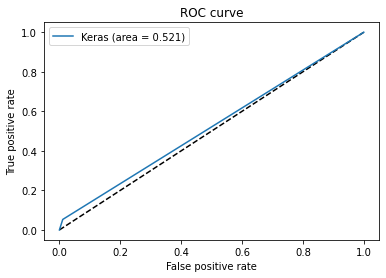

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()

In [37]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = Sequential()
model.add(Dense(40, input_dim=56, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history=model.fit(X_train, y_train, epochs=150, batch_size=10)
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set
# list all data in history


Epoch 1/50
2000/2000 [==============================] - 4s 2ms/step - loss: 5.0216 - accuracy: 0.5964 - val_loss: 0.9623 - val_accuracy: 0.6386
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9553 - accuracy: 0.6351 - val_loss: 0.7806 - val_accuracy: 0.6896
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7428 - accuracy: 0.6562 - val_loss: 0.6418 - val_accuracy: 0.6889
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6492 - accuracy: 0.6824 - val_loss: 0.6353 - val_accuracy: 0.7179
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6127 - accuracy: 0.7071 - val_loss: 0.6089 - val_accuracy: 0.7122
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5999 - accuracy: 0.7155 - val_loss: 0.5949 - val_accuracy: 0.7172
Epoch 7/50
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5998 - accuracy: 0.7089 - val_loss: 0.5933 - val_accuracy:

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.72      0.99      0.83     11355
           1       0.53      0.03      0.07      4566

   micro avg       0.71      0.71      0.71     15921
   macro avg       0.62      0.51      0.45     15921
weighted avg       0.66      0.71      0.61     15921

AUC :  0.5112466157591202


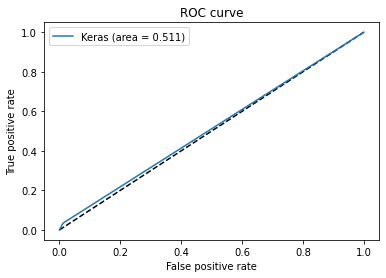

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()

## paired t test

In [29]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from mlxtend.evaluate import paired_ttest_5x2cv

#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores1 = cross_val_score(pipe_erf, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=rfne_pipe, estimator2=ann_model,X=X_test,y=y_test, scoring='roc_auc', random_seed=123)
#t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipek,X=X_train,y=y_train, scoring='accuracy', random_seed=1)#0.001 t-statistic 7.651

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.96it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.21it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 19.38it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.27it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.61it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.90it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.57it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.66it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.11it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.53it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.14it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 90.16it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.27it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.68it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.28it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.82it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.04it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.48it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.51it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.39it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.27it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.11it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.39it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.21it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.63it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.80it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.93it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.98it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.39it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.31it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.21it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.53it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.36it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.78it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.63it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.83it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.47it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.19it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.54it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.97it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.34it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.29it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.72it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.86it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.15it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.89it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.84it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.75it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.91it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.46it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.56it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.22it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.71it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.89it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.74it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.43it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.34it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.63it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.05it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.80it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.48it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.98it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.00it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.73it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.55it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.86it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.92it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.08it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.82it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.59it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.07it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.20it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.69it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.85it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.81it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.48it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.82it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.85it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.31it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 79.37it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.64it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.14it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.58it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.34it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.44it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.89it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.83it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.39it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.89it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.05it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.52it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.53it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.02it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.55it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.98it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.80it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.17it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.19it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.74it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.11it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.39it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.68it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.43it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.19it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.97it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.31it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 81.17it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.28it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.41it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.02it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.61it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.22it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.41it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.14it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.86it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.26it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.03it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.66it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.16it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.57it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.10it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.27it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.96it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.25it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.02it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.69it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.45it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.59it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.21it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.40it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 89.13it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.74it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.11it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.76it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.73it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.76it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.33it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.82it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 116.27it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.13it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.52it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.67it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.37it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.76it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.87it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.97it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 24.59it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.45it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.24it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.50it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.36it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.33it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.70it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.25it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.03it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.61it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.42it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.75it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.57it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.16it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.56it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.92it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.53it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.21it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.59it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.16it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.83it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.81it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.44it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.14it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.26it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.86it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.22it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.12it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.60it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.66it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.82it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.77it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.81it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.80it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.56it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.74it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.63it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.05it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.66it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.34it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.82it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.55it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.99it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.12it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.75it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.25it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.96it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.86it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.26it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.96it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.41it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.40it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.59it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.97it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.25it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.84it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.00it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.63it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.81it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.91it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.42it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.94it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.93it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.07it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.30it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.53it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.28it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.80it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.00it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.28it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.11it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.90it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.22it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.21it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.37it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.41it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.75it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.82it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.47it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.30it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.00it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.60it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.50it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.49it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.66it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.39it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.80it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.59it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.75it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.03it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.85it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.75it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.53it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.13it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.74it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.98it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.67it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.52it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.04it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.96it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.31it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.19it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.53it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.48it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.13it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.42it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.92it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.78it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.19it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.84it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.93it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.43it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.58it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.94it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.12it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.71it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.82it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.72it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.82it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.04it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.58it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.27it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.53it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.43it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.95it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.07it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.54it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.59it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.47it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.47it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.07it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.35it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.74it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.80it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.97it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.73it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.26it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.68it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.98it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.29it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.63it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.53it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.74it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.96it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.11it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.23it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.31it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.65it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.62it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.37it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.23it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.11it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.28it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.01it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.59it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.53it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.12it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.35it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.96it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.93it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.32it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.68it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.17it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.74it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.75it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.72it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.41it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.78it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.62it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.89it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.10it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.95it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.02it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.93it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.02it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.03it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.38it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.97it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.18it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.76it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.14it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.25it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.25it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.60it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.48it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.68it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.88it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.62it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.29it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.14it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.87it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.28it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.45it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.87it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.81it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.93it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.69it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.16it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.43it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.19it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.36it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.86it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.17it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.50it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.25it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.11it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.99it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.21it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 81.04it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.29it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.03it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.45it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.82it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.02it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.43it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.27it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.52it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.72it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.99it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.67it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.94it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.16it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.82it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.97it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.35it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.60it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.43it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.13it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.73it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.65it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.02it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.42it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.24it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.20it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.89it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.92it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.13it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.26it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.54it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.99it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.58it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.90it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.01it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.90it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.51it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.63it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.43it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.09it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.66it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.17it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.09it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.06it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.24it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.33it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.22it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.67it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.64it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.13it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.07it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.59it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.12it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.93it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.75it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.99it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.92it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.28it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.51it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.07it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.98it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.38it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.63it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.51it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.48it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.76it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.76it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.23it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.25it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.31it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.82it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.43it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.59it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.97it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.44it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.58it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to floa

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.00it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.99it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.00it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.74it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.95it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.17it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.16it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.70it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.01it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.88it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.95it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.97it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.89it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.38it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.13it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.17it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.95it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.07it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.93it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.90it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.75it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.87it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.81it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.44it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.80it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.35it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.56it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.64it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.82it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.45it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.53it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.35it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.85it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.02it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.63it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.13it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.67it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.05it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.24it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.58it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.19it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.69it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.57it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.37it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.64it/s]


Computing transition probabilities:   0%|          | 0/31 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 107.30it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.27it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.53it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.24it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


P-value: 0.425, t-Statistic: 0.868


In [28]:
#RFNE VS RF
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=rfne_pipe, estimator2=pipe_rf,X=X_train,y=y_train, scoring='accuracy', random_seed=1)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.49it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.76it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.92it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.36it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.50it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.80it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.93it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.60it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.96it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.17it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.24it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.19it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.84it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.35it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.11it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.52it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.99it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.49it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.43it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.37it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.07it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.00it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.97it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.14it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 25.30it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.07it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.25it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.69it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.42it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.71it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.83it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.09it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.43it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.65it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.21it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.80it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.27it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.56it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.13it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.96it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.10it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.18it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.37it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.87it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.38it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.27it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.29it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.46it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.56it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.92it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.07it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.85it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.85it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.51it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.13it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.01it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.50it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.14it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.33it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.34it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.13it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.35it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.69it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.85it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.13it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.14it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.81it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.89it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.40it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.96it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.89it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.85it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.45it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.21it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.06it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.56it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.68it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.08it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.59it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.25it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.30it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.64it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.76it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.35it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.88it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.35it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.94it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.83it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.31it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.14it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.24it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.67it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.31it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.86it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.82it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.27it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.01it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.36it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.33it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.70it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.14it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.25it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.27it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.53it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.21it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.42it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.48it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.68it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.41it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.65it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.67it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.13it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.88it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.24it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.47it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.18it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.66it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.62it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.73it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.20it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.60it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.04it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.06it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 26.00it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.81it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.02it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.18it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.48it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.41it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.13it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.25it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.29it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.98it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.88it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.03it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.86it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.18it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.21it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.07it/s]


Computing transition probabilities:   0%|          | 0/39 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 92.94it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.74it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.10it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.08it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.94it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.68it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.18it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.13it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.58it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.21it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.21it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.63it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.14it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.07it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.43it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.85it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.21it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.17it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.80it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.91it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.10it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.01it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.41it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.07it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.28it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.38it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.53it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.64it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.50it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.54it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.87it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.10it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.19it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.14it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.29it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.75it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.05it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.79it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.48it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.12it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.49it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.31it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.38it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.69it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.42it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.29it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.88it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.17it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.02it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.27it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.94it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.26it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.99it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.52it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.82it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.63it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.65it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.91it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.15it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.67it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.14it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 26.97it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.04it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.08it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.93it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.57it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.91it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.69it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.51it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.83it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.89it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.56it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.49it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.95it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.99it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.18it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.16it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 24.89it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.07it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.48it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.08it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.39it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.84it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.97it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.61it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.18it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.43it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.14it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.07it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.04it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.96it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.93it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.30it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.95it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.98it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.02it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.30it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.49it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.30it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.52it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.62it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.50it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.56it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.65it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.14it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.88it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.76it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.68it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.07it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.95it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.15it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.03it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.52it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.94it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.95it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.37it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.58it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.16it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.50it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.16it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.29it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.89it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.68it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.65it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.45it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.50it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.61it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.44it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.52it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.76it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.23it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.75it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.31it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.33it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.41it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.74it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.27it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.18it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.87it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.88it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.80it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.95it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.68it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.25it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.97it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.93it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.82it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.68it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.03it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.23it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.66it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.30it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 25.91it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.79it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.51it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.55it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.40it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.03it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 26.29it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.96it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.25it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.09it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.71it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.05it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.67it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.01it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.58it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.07it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.81it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.50it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.18it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.66it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.75it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.78it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.22it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 22.86it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.66it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.96it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.57it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.40it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.65it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.67it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.54it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.10it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 80.13it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.42it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.86it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.82it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.54it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.65it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.54it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.55it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.02it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.86it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.81it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.27it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.54it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.45it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.43it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 80.19it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 87.88it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 90.80it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.61it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.92it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.13it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.91it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.77it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 82.32it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.96it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.89it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.58it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.54it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.29it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 84.24it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.42it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.71it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.62it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.83it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.57it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 79.10it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.27it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.98it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.05it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 81.05it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.27it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.65it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 79.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.71it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 81.95it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.16it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.21it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.95it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.32it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.41it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.35it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.43it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.00it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.46it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 25.50it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 24.69it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 25.95it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.45it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.98it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.36it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.48it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.64it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.31it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.55it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.19it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.34it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.39it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.55it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.82it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.17it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.56it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.12it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.21it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.98it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.08it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.66it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.70it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 23.34it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 25.44it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.65it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.49it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.63it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.90it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.94it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.94it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.29it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.85it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.53it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.11it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.99it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.26it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.40it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.36it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.21it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.99it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.80it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.85it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.23it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.69it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.35it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.78it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.55it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.49it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.30it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.76it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.73it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.19it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.49it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.55it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.63it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.18it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.47it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.39it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.55it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.21it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.83it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.34it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.91it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.78it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.80it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.49it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.05it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.37it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.54it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.12it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.84it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 79.87it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.94it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.94it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.74it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.07it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.59it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.82it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.20it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.88it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.56it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.93it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.71it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.74it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.01it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.13it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.43it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.47it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.46it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.60it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.80it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.97it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.14it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.34it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.37it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.89it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.50it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.21it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.62it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.45it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.18it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.97it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.37it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


P-value: 0.185, t-Statistic: -1.536


In [31]:
predict_w_val= pipe.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
prediction_rf_val= pipe_rf.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
pred_n_val = model.predict([X_val_transformed])


In [32]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve, auc,f1_score


prec_n,rec_n,thressholds_n= precision_recall_curve(y_val,pred_n_val[:,1])
prec_w,rec_w,thressholds_w= precision_recall_curve(y_val,predict_w_val[:,1])
prec_rf,rec_rf,thressholds_rf= precision_recall_curve(y_val,prediction_rf_val[:,1])

auc_n = auc(rec_n, prec_n)
auc_w = auc(rec_w, prec_w)
auc_rf = auc(rec_rf, prec_rf)

print(auc_n,auc_w,auc_rf)

auc_n = auc(rec_n, prec_n)
auc_w = auc(rec_w, prec_w)
auc_rf = auc(rec_rf, prec_rf)

0.4397317988239787 0.46816941494199493 0.46309874598633316


In [33]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve


prec_n,rec_n,thressholds_n= precision_recall_curve(y_val,pred_n_val[:,1])
prec_w,rec_w,thressholds_w= precision_recall_curve(y_val,predict_w_val[:,1])
prec_rf,rec_rf,thressholds_rf= precision_recall_curve(y_val,prediction_rf_val[:,1])


one
0.35284966 0.4465195246179966 0.4465195246179966
two
0.35209637490973444 0.4473684210526316 0.4473684210526316
three
0.3301959785195562 0.44906621392190155 0.44906621392190155


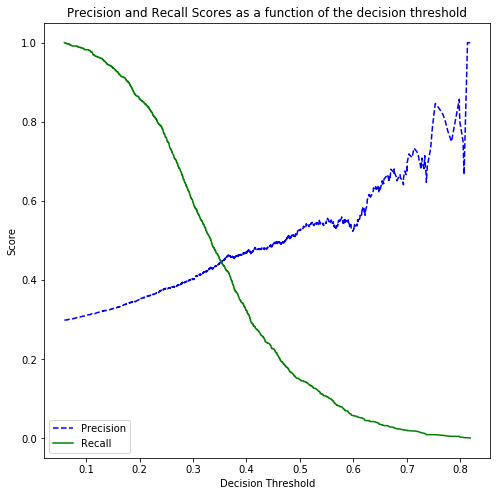

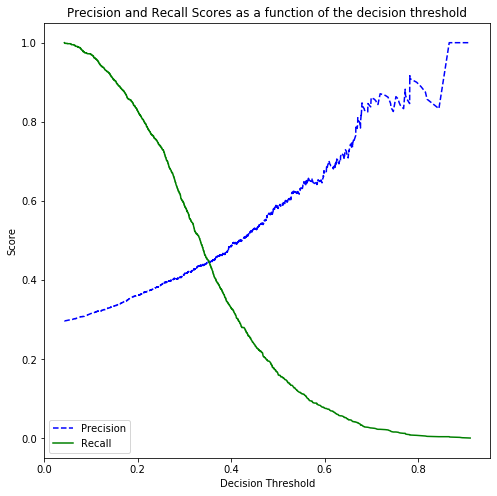

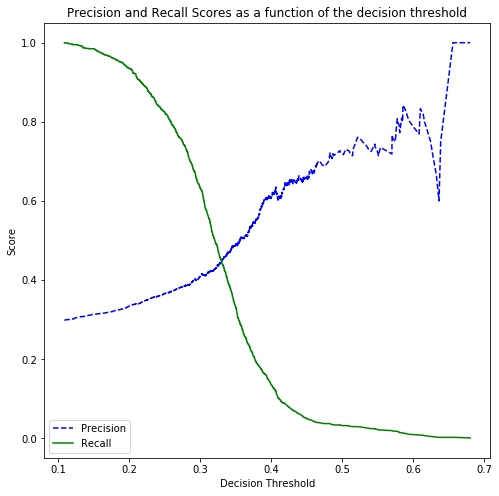

In [36]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    for i,ii in enumerate(thresholds):
        if recalls[i]==precisions[i]:
            print(thresholds[i],precisions[i],recalls[i])
print('one')
plot_precision_recall_vs_threshold(prec_n,rec_n,thressholds_n)
print('two')
plot_precision_recall_vs_threshold(prec_w,rec_w,thressholds_w)
print('three')
plot_precision_recall_vs_threshold(prec_rf,rec_rf,thressholds_rf)

In [38]:
pred_n = model.predict([X_test_transformed])
pred_w = pipe.predict_proba(X_test)
prediction_rf = pipe_rf.predict_proba(X_test)

Ks_2sampResult(statistic=0.04070096099491238, pvalue=7.0283050320831746e-12)
Ks_2sampResult(statistic=0.13843351548269578, pvalue=6.230748218754943e-133)


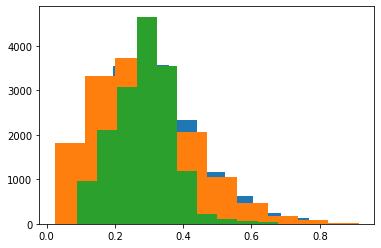

In [39]:
plt.hist(pred_n[:,1])
plt.hist(pred_w[:,1])
plt.hist(prediction_rf[:,1])

#different distributions
print(ks_2samp(pred_n[:,1],pred_w[:,1]))
print(ks_2samp(pred_n[:,1],prediction_rf[:,1]))


In [58]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve, auc,f1_score


prec_n_t,rec_n_t,thressholds_n= precision_recall_curve(y_test,pred_n[:,1])
prec_w_t,rec_w_t,thressholds_w= precision_recall_curve(y_test,pred_w[:,1])
prec_rf_t,rec_rf_t,thressholds_rf= precision_recall_curve(y_test,prediction_rf[:,1])

auc_n_t = auc(rec_n_t, prec_n_t)
auc_w_t = auc(rec_w_t, prec_w_t)
auc_rf_t = auc(rec_rf_t, prec_rf_t)


auc_n_t = auc(rec_n_t, prec_n_t)
auc_w_t = auc(rec_w_t, prec_w_t)
auc_rf_t = auc(rec_rf_t, prec_rf_t)
print(auc_n_t,auc_w_t,auc_rf_t)

0.4057842292000835 0.42491077985865944 0.4247142269065036


In [71]:
prd = (prediction_rf[:,1]>0.332)
prd2 = (pred_w[:,1]>0.35)
prd3 = (pred_n[:,1]>0.68)

In [35]:
print(np.quantile(prediction_rf[:,1],0.95))
print(np.quantile(pred_w[:,1],0.95))
print(np.quantile(pred_n[:,1],0.95))

0.4104458959863581
0.5449144597866745
0.6883416175842285


In [72]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

print(confusion_matrix(y_test,prd))
print(confusion_matrix(y_test,prd2))
print(confusion_matrix(y_test,prd3))

print(classification_report(y_test,prd))

print(classification_report(y_test,prd2))
print(classification_report(y_test,prd3))




[[8834 2521]
 [2664 1902]]
[[8604 2751]
 [2541 2025]]
[[11280    75]
 [ 4472    94]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     11355
           1       0.43      0.42      0.42      4566

    accuracy                           0.67     15921
   macro avg       0.60      0.60      0.60     15921
weighted avg       0.67      0.67      0.67     15921

              precision    recall  f1-score   support

           0       0.77      0.76      0.76     11355
           1       0.42      0.44      0.43      4566

    accuracy                           0.67     15921
   macro avg       0.60      0.60      0.60     15921
weighted avg       0.67      0.67      0.67     15921

              precision    recall  f1-score   support

           0       0.72      0.99      0.83     11355
           1       0.56      0.02      0.04      4566

    accuracy                           0.71     15921
   macro avg       0.64      0.51      0.44

In [73]:
# Example of calculating the mcnemar test
import numpy as np
from mlxtend.evaluate import mcnemar_table



# The correct target (class) labels
y_target = np.array(y_test)

# Class labels predicted by model 1
y_model1 = np.array(prd)

# Class labels predicted by model 2
y_model2 = np.array(prd2)

tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)


from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
table = tb
# calculate mcnemar test
result = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')





[[9427 1202]
 [1309 3983]]
statistic=1202.000, p-value=0.034
Different proportions of errors (reject H0)


In [8]:
from sklearn.ensemble import StackingClassifier
from NodeTransformer import NodeTransformer

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=200,max_depth=6,dimension=10)), ('logreg',LogisticRegression())]
pipe = Pipeline(estimators)

ests = [('rf', RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)),
  ('rf2', pipe)]

clf = StackingClassifier(estimators=ests, final_estimator=LogisticRegression())

clf.fit(X_train,y_train)   

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.24it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.90it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.38it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance at

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 80.79it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.54it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.99it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.09it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.74it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.72it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.88it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.22it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.13it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.70it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 95.13it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.52it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.21it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.08it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.33it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



0.9170832435130872


In [15]:
est0 = clf.estimators_[0]
est1 = clf.estimators_[1]

est0.feature_importances_

importances = est0.feature_importances_
std = np.std([tree.feature_importances_ for tree in est0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



#print(roc_auc_score(y_test, est1.predict_proba(X_test)[:,1]))

Feature ranking:
1. feature 3 (0.407734)
2. feature 40 (0.195840)
3. feature 5 (0.052937)
4. feature 24 (0.047776)
5. feature 0 (0.040549)
6. feature 41 (0.032069)
7. feature 27 (0.030850)
8. feature 34 (0.029743)
9. feature 6 (0.027470)
10. feature 38 (0.020344)
11. feature 37 (0.016580)
12. feature 1 (0.013039)
13. feature 2 (0.011730)
14. feature 35 (0.011391)
15. feature 4 (0.006508)
16. feature 33 (0.006252)
17. feature 25 (0.004801)
18. feature 14 (0.004457)
19. feature 18 (0.004182)
20. feature 28 (0.003650)
21. feature 32 (0.003467)
22. feature 29 (0.003304)
23. feature 19 (0.003260)
24. feature 7 (0.003104)
25. feature 11 (0.002539)
26. feature 21 (0.001991)
27. feature 36 (0.001978)
28. feature 39 (0.001820)
29. feature 20 (0.001301)
30. feature 10 (0.001085)
31. feature 30 (0.001082)
32. feature 22 (0.001012)
33. feature 15 (0.000951)
34. feature 26 (0.000948)
35. feature 16 (0.000842)
36. feature 13 (0.000737)
37. feature 31 (0.000704)
38. feature 12 (0.000557)
39. feature 

Feature: 0, Score: -0.15754
Feature: 1, Score: 0.28134
Feature: 2, Score: -0.18956
Feature: 3, Score: 0.39139
Feature: 4, Score: 0.71407
Feature: 5, Score: 0.40136
Feature: 6, Score: -0.32701
Feature: 7, Score: 0.14720
Feature: 8, Score: 0.48775
Feature: 9, Score: -0.27087
Feature: 10, Score: -0.36481
Feature: 11, Score: 0.06097
Feature: 12, Score: -0.53173
Feature: 13, Score: -0.00765
Feature: 14, Score: -0.60395
Feature: 15, Score: 0.05479
Feature: 16, Score: 0.00957
Feature: 17, Score: -0.10476
Feature: 18, Score: -0.11898
Feature: 19, Score: -0.31841
Feature: 20, Score: 0.54234
Feature: 21, Score: 0.52077
Feature: 22, Score: -0.44968
Feature: 23, Score: 0.07379
Feature: 24, Score: -0.04465
Feature: 25, Score: 0.10182
Feature: 26, Score: 0.61248
Feature: 27, Score: -0.29055
Feature: 28, Score: 0.47508
Feature: 29, Score: -0.11496
Feature: 30, Score: 0.99954
Feature: 31, Score: -0.41253
Feature: 32, Score: 0.21990
Feature: 33, Score: 0.05971
Feature: 34, Score: -0.19968
Feature: 35, 

Feature: 1830, Score: -0.79583
Feature: 1831, Score: 0.07383
Feature: 1832, Score: -0.36620
Feature: 1833, Score: -0.22772
Feature: 1834, Score: 0.15019
Feature: 1835, Score: -0.17918
Feature: 1836, Score: -0.73625
Feature: 1837, Score: -0.36572
Feature: 1838, Score: 0.73540
Feature: 1839, Score: -0.15285
Feature: 1840, Score: -0.30518
Feature: 1841, Score: -0.30138
Feature: 1842, Score: 0.18129
Feature: 1843, Score: -0.92305
Feature: 1844, Score: 0.22028
Feature: 1845, Score: 0.07748
Feature: 1846, Score: -0.28012
Feature: 1847, Score: 1.04131
Feature: 1848, Score: 0.04332
Feature: 1849, Score: -0.28889
Feature: 1850, Score: -0.70974
Feature: 1851, Score: -0.49637
Feature: 1852, Score: -0.26933
Feature: 1853, Score: -1.00655
Feature: 1854, Score: 0.62960
Feature: 1855, Score: -0.57297
Feature: 1856, Score: -0.06008
Feature: 1857, Score: 0.93913
Feature: 1858, Score: -0.45340
Feature: 1859, Score: -0.49031
Feature: 1860, Score: -0.10225
Feature: 1861, Score: -0.35138
Feature: 1862, Sco

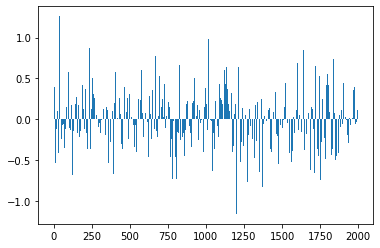

In [23]:
import matplotlib.pyplot as pyplot


importance = est1.steps[2][1].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()




In [125]:
from NodeTransformerExtremeTrees import NodeTransformerExtremeTrees

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformerExtremeTrees(n_estimators=200,max_depth=7,dimension=10)), ('logreg',LogisticRegression())]
pipee = Pipeline(estimators)

pipee.fit(X_train,y_train)   

print(roc_auc_score(y_test, pipee.predict_proba(X_test)[:,1]))

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.94it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.30it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.06it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



0.9075927417677381
